<a href="https://colab.research.google.com/github/SilentStoneCA/papercode/blob/main/LeNet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [186]:
mnist = tf.keras.datasets.mnist
(training_images_orig, training_labels_orig), (test_images_orig, test_labels_orig) = mnist.load_data()

In [187]:
training_images = np.pad(training_images_orig, ((0,0), (2,2), (2,2)))
test_images = np.pad(test_images_orig, ((0, 0,), (2, 2), (2,2)))
training_images = training_images.reshape(-1, 32, 32,1) 
test_images = test_images.reshape(-1, 32, 32, 1)
training_labels = to_categorical(training_labels_orig)
test_labels = to_categorical(test_labels_orig)

In [157]:
training_images, training_labels = shuffle(training_images, training_labels)
test_images, test_labels = shuffle(test_images, test_labels )

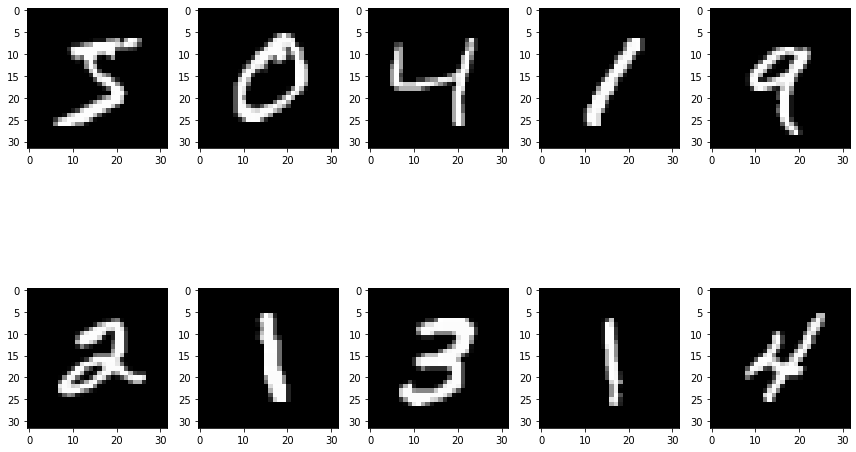

In [170]:
f, axes = plt.subplots(2, 5)
f.set_size_inches(12, 12)
k = 0
for i in range(2):
  for j in range(5):
    axes[i,j].imshow(train_images[k].reshape(32,32), cmap = 'gray')
    k = k + 1
  plt.tight_layout()  



In [143]:
BATCH_SIZE = 256
steps_per_epoch = int(training_images.shape[0] / BATCH_SIZE)

In [144]:
train_gen = ImageDataGenerator(rescale = 1 / 255.)

In [145]:
train_gen = ImageDataGenerator(rescale = 1 / 255.,
                               zoom_range=0.1,
                               rotation_range = 20,
                               height_shift_range = 0.1,
                               width_shift_range = 0.1)

In [146]:
train_data = train_gen.flow(
                         training_images,
                         training_labels,
                         BATCH_SIZE)

In [147]:
valid_gen = ImageDataGenerator(rescale = 1 / 255.)

In [148]:
valid_data = valid_gen.flow(
                    test_images,
                    test_labels,
                    BATCH_SIZE)

In [149]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(6, (5,5), activation='tanh', input_shape=(32,32,1)),
      tf.keras.layers.AveragePooling2D(),
      tf.keras.layers.Conv2D(16, (5,5), activation= 'tanh'),
      tf.keras.layers.AveragePooling2D(),
      tf.keras.layers.Conv2D(120, (5,5), activation = 'tanh'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=84, activation='tanh'),
      tf.keras.layers.Dense(units=10, activation= 'sigmoid')
            
]) 

In [150]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_30 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_14 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 84)              

In [161]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [174]:
history = model.fit(train_data, validation_data = valid_data, epochs=20,  verbose=1, steps_per_epoch = steps_per_epoch, callbacks=[learning_rate_reduction])

Epoch 1/20
234/234 [==============================] - 40s 172ms/step - loss: 0.0497 - accuracy: 0.9843 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 2/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 3/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0255 - val_accuracy: 0.9917
Epoch 4/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0243 - val_accuracy: 0.9920

Epoch 00004: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 5/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0243 - val_accuracy: 0.9920
Epoch 6/20
234/234 [==============================] - 41s 174ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0256 - val_accuracy: 0.9924
Epoch 7/20
234/234 [==============================

In [175]:
model.evaluate(valid_data)

40/40 [==============================] - 2s 48ms/step - loss: 0.0242 - accuracy: 0.9921


[0.024173032492399216, 0.9921000003814697]

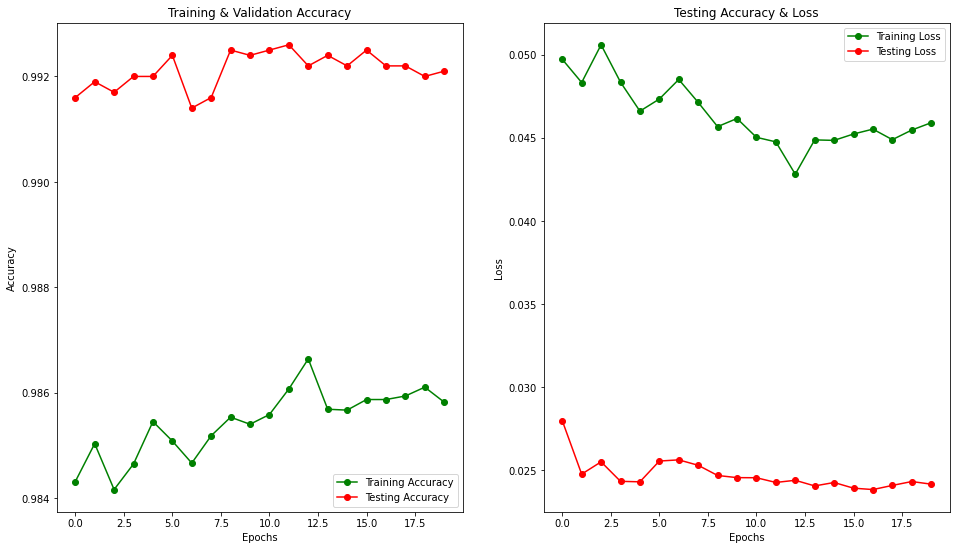

In [176]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [188]:
predictions = model.predict_classes(test_images / 255.)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [189]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd 
import seaborn as sns

In [191]:
classes = ["Class " + str(i) for i in range(10) ]
print(classification_report(test_labels_orig, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       980
     Class 1       0.99      1.00      1.00      1135
     Class 2       0.99      1.00      0.99      1032
     Class 3       0.99      1.00      0.99      1010
     Class 4       0.99      0.99      0.99       982
     Class 5       0.99      0.99      0.99       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.99      0.99      1028
     Class 8       1.00      0.98      0.99       974
     Class 9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [192]:
cm = confusion_matrix(test_labels_orig,predictions)

In [195]:
cm = pd.DataFrame(cm , index = [i for i in range(10)] , columns = [i for i in range(10)])

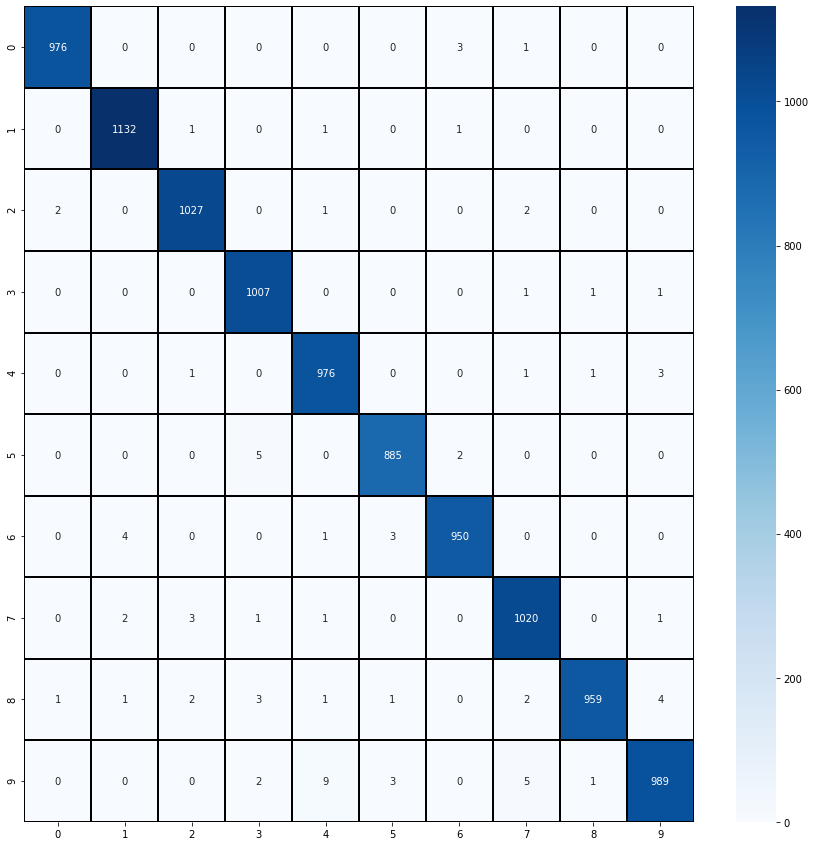

In [197]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')